In [2]:
#import libraries
import pandas as pd
import geopandas as gpd
import fiona
import geopandas.geoseries  
import folium
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
#import SVI data
svi = gpd.read_file('data/Los_Angeles_County_CVA_Social_Vulnerability_Index.geojson')
svi.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Census_Tract                     2327 non-null   object  
 1   County                           2327 non-null   object  
 2   CSA_Type                         2327 non-null   object  
 3   CSA_Label                        2327 non-null   object  
 4   DRP_Planning_Area                2327 non-null   object  
 5   DPH_Service_Planning_Area        2327 non-null   object  
 6   City_of_Los_Angeles_CPA          994 non-null    object  
 7   Population                       2327 non-null   int64   
 8   Children                         2327 non-null   float64 
 9   Older_Adults                     2327 non-null   float64 
 10  Older_Adults_Living_Alone        2327 non-null   float64 
 11  Limited_English                  2327 non-null   float64 
 12

In [4]:
#Import neighborhood shapes
nei = gpd.read_file('data/Los Angeles Neighborhood Map.geojson')
nei.head()
nei.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
svi_by_nei = svi.sjoin(nei, how="inner", predicate='intersects')

In [6]:
nei.head(3)

,external_i,name,location,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type,geometry
0,acton,Acton,POINT(34.497355239240846 -118.16981019229348),-118.16981019229348,None,39.3391089485,Acton L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),acton,34.497355239240846,None,L.A. County Neighborhood (Current),unincorporated-area,"MULTIPOLYGON (((-118.20262 34.53899, -118.1894..."
1,adams-normandie,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,None,0.805350187789,Adams-Normandie L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),adams-normandie,34.031461499124156,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-118.30901 34.03741, -118.3004..."
2,agoura-hills,Agoura Hills,POINT(34.146736499122795 -118.75988450000015),-118.75988450000015,None,8.14676029818,Agoura Hills L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),agoura-hills,34.146736499122795,None,L.A. County Neighborhood (Current),standalone-city,"MULTIPOLYGON (((-118.76193 34.16820, -118.7263..."


In [7]:
svi.head(3)

,Census_Tract,County,CSA_Type,CSA_Label,DRP_Planning_Area,DPH_Service_Planning_Area,City_of_Los_Angeles_CPA,Population,Children,Older_Adults,...,Asian,NHOPI,Other_Race,Two_or_More_Races,SoVI_Score,SoVI_Thirds,ObjectId,Shape__Area,Shape__Length,geometry
0,Census Tract 5709.02,Los Angeles County,City,City of Lakewood,Gateway Planning Area,East,None,3765,27.8,14.0,...,10.9,0.0,0.4,8.0,2.25,3,1,1.536760e+06,5208.283880,"POLYGON ((-118.12509 33.86032, -118.12287 33.8..."
1,Census Tract 5715.02,Los Angeles County,City,City of Long Beach,Gateway Planning Area,South Bay,None,4700,24.6,14.0,...,21.7,0.1,0.6,1.3,-1.77,1,2,2.001416e+06,5938.830961,"POLYGON ((-118.19274 33.84376, -118.18975 33.8..."
2,Census Tract 9106.05,Los Angeles County,City,City of Palmdale,Antelope Valley Planning Area,Antelope Valley,None,4710,38.4,7.0,...,5.3,0.0,0.2,2.5,2.39,3,3,1.996430e+06,5983.046762,"POLYGON ((-118.07616 34.57281, -118.06728 34.5..."


In [8]:
# display.max_columns option controls the number of columns to be printed
pd.set_option('display.max_columns', None)

In [9]:
svi_by_nei.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4916 entries, 0 to 2270
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Census_Tract                     4916 non-null   object  
 1   County                           4916 non-null   object  
 2   CSA_Type                         4916 non-null   object  
 3   CSA_Label                        4916 non-null   object  
 4   DRP_Planning_Area                4916 non-null   object  
 5   DPH_Service_Planning_Area        4916 non-null   object  
 6   City_of_Los_Angeles_CPA          2026 non-null   object  
 7   Population                       4916 non-null   int64   
 8   Children                         4916 non-null   float64 
 9   Older_Adults                     4916 non-null   float64 
 10  Older_Adults_Living_Alone        4916 non-null   float64 
 11  Limited_English                  4916 non-null   float64 
 12

In [10]:
# clean up columns
svi_by_nei.columns.to_list()

['Census_Tract',
 'County',
 'CSA_Type',
 'CSA_Label',
 'DRP_Planning_Area',
 'DPH_Service_Planning_Area',
 'City_of_Los_Angeles_CPA',
 'Population',
 'Children',
 'Older_Adults',
 'Older_Adults_Living_Alone',
 'Limited_English',
 'No_High_School_Diploma',
 'Female',
 'Female_Householder',
 'Asthma',
 'Cardiovascular_Disease',
 'Disability',
 'No_Health_Insurance',
 'Living_in_Group_Quarters',
 'Mobile_Homes',
 'Rent_Burden',
 'Renters',
 'Median_Income',
 'Poverty',
 'Households_Without_Vehicle_Acce',
 'Transit_Access',
 'Outdoor_Workers',
 'Unemployed',
 'Foreign_Born',
 'Library_Access',
 'No_Internet_Subscription',
 'Voter_Turnout_Rate',
 'Hispanic_Latinx',
 'White',
 'Black',
 'Native_Tribal',
 'Asian',
 'NHOPI',
 'Other_Race',
 'Two_or_More_Races',
 'SoVI_Score',
 'SoVI_Thirds',
 'ObjectId',
 'Shape__Area',
 'Shape__Length',
 'geometry',
 'index_right',
 'external_i',
 'name',
 'location',
 'latitude',
 'slug_1',
 'sqmi',
 'display_na',
 'set',
 'slug',
 'longitude',
 'name_1',
 

In [11]:
columns_to_keep = ['Census_Tract',
 'Population',
 'Children',
 'Older_Adults_Living_Alone',
 'Limited_English',
 'No_High_School_Diploma',
 'Female_Householder',
 'Asthma',
 'Cardiovascular_Disease',
 'Disability',
 'No_Health_Insurance',
 'Living_in_Group_Quarters',
 'Mobile_Homes',
 'Rent_Burden',
 'Renters',
 'Poverty',
 'Households_Without_Vehicle_Acce',
 'Transit_Access',
 'Outdoor_Workers',
 'Unemployed',
 'Foreign_Born',
 'Library_Access',
 'No_Internet_Subscription',
 'Hispanic_Latinx',
 'White',
 'Black',
 'Native_Tribal',
 'Asian',
 'NHOPI',
 'Other_Race',
 'SoVI_Score',
 'geometry',
 'name',
 'location',
 'type']

# add it to a new dataframe
svi_by_nei = svi_by_nei[columns_to_keep]

svi_by_nei.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4916 entries, 0 to 2270
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Census_Tract                     4916 non-null   object  
 1   Population                       4916 non-null   int64   
 2   Children                         4916 non-null   float64 
 3   Older_Adults_Living_Alone        4916 non-null   float64 
 4   Limited_English                  4916 non-null   float64 
 5   No_High_School_Diploma           4916 non-null   float64 
 6   Female_Householder               4916 non-null   float64 
 7   Asthma                           4916 non-null   float64 
 8   Cardiovascular_Disease           4916 non-null   float64 
 9   Disability                       4916 non-null   float64 
 10  No_Health_Insurance              4916 non-null   float64 
 11  Living_in_Group_Quarters         4916 non-null   float64 
 12

In [16]:
#create dataframe for only the census tracts for the neighborhoods that are HH clusters
montebello = svi_by_nei[svi_by_nei['name']=='Montebello']
montebello_sorted = montebello.sort_values(by='SoVI_Score',ascending = False)

#top10
montebello_top = montebello_sorted.head(1)
montebello_top

,Census_Tract,Population,Children,Older_Adults_Living_Alone,Limited_English,No_High_School_Diploma,Female_Householder,Asthma,Cardiovascular_Disease,Disability,No_Health_Insurance,Living_in_Group_Quarters,Mobile_Homes,Rent_Burden,Renters,Poverty,Households_Without_Vehicle_Acce,Transit_Access,Outdoor_Workers,Unemployed,Foreign_Born,Library_Access,No_Internet_Subscription,Hispanic_Latinx,White,Black,Native_Tribal,Asian,NHOPI,Other_Race,SoVI_Score,geometry,name,location,type
989,Census Tract 5320.01,2822,26.8,20.4,36.0,44.2,14.6,41.4,8.3,18.1,14.5,0.0,0.0,71.1,72.1,23.5,14.6,100.0,8.8,3.2,40.2,2.0,46.5,93.5,4.5,1.3,0.0,0.7,0.0,0.0,4.98,"POLYGON ((-118.12982 34.00242, -118.12708 34.0...",Montebello,POINT(34.010314998189017 -118.10833743364199),standalone-city


In [17]:
#create dataframe for only the census tracts for the neighborhoods that are HH clusters
reseda = svi_by_nei[svi_by_nei['name']=='Reseda']
reseda_sorted = reseda.sort_values(by='SoVI_Score',ascending = False)

#top10
reseda_top = reseda_sorted.head(1)
reseda_top

,Census_Tract,Population,Children,Older_Adults_Living_Alone,Limited_English,No_High_School_Diploma,Female_Householder,Asthma,Cardiovascular_Disease,Disability,No_Health_Insurance,Living_in_Group_Quarters,Mobile_Homes,Rent_Burden,Renters,Poverty,Households_Without_Vehicle_Acce,Transit_Access,Outdoor_Workers,Unemployed,Foreign_Born,Library_Access,No_Internet_Subscription,Hispanic_Latinx,White,Black,Native_Tribal,Asian,NHOPI,Other_Race,SoVI_Score,geometry,name,location,type
292,Census Tract 1331,5578,20.1,18.8,23.9,18.5,7.8,73.5,10.7,12.9,9.4,3.8,0.0,56.4,58.5,14.0,16.9,100.0,11.2,3.1,44.5,0.7,23.2,33.6,51.1,4.8,0.5,8.5,0.0,0.2,6.07,"POLYGON ((-118.55349 34.18799, -118.55221 34.1...",Reseda,POINT(34.203603499122082 -118.540368),segment-of-a-city


In [18]:
#create dataframe for only the census tracts for the neighborhoods that are HH clusters
lakelosangeles = svi_by_nei[svi_by_nei['name']=='Lake Los Angeles']
lakelosangeles_sorted = lakelosangeles.sort_values(by='SoVI_Score',ascending = False)

#top10
lakelosangeles_top = lakelosangeles_sorted.head(1)
lakelosangeles_top

,Census_Tract,Population,Children,Older_Adults_Living_Alone,Limited_English,No_High_School_Diploma,Female_Householder,Asthma,Cardiovascular_Disease,Disability,No_Health_Insurance,Living_in_Group_Quarters,Mobile_Homes,Rent_Burden,Renters,Poverty,Households_Without_Vehicle_Acce,Transit_Access,Outdoor_Workers,Unemployed,Foreign_Born,Library_Access,No_Internet_Subscription,Hispanic_Latinx,White,Black,Native_Tribal,Asian,NHOPI,Other_Race,SoVI_Score,geometry,name,location,type
915,Census Tract 9001.02,588,19.3,28.5,12.1,43.1,6.6,108.4,13.5,21.1,9.9,0.0,19.1,55.3,36.7,32.9,16.8,0.0,18.5,5.2,24.0,7.3,44.5,48.0,44.7,1.5,0.0,2.2,0.0,0.7,4.13,"POLYGON ((-117.77437 34.82330, -117.77421 34.8...",Lake Los Angeles,POINT(34.611038948416571 -117.83603921804665),unincorporated-area


In [19]:
#create dataframe for only the census tracts for the neighborhoods that are HH clusters
longbeach = svi_by_nei[svi_by_nei['name']=='Long Beach']
longbeach_sorted = longbeach.sort_values(by='SoVI_Score',ascending = False)

#top10
longbeach_top = longbeach_sorted.head(1)
longbeach_top

,Census_Tract,Population,Children,Older_Adults_Living_Alone,Limited_English,No_High_School_Diploma,Female_Householder,Asthma,Cardiovascular_Disease,Disability,No_Health_Insurance,Living_in_Group_Quarters,Mobile_Homes,Rent_Burden,Renters,Poverty,Households_Without_Vehicle_Acce,Transit_Access,Outdoor_Workers,Unemployed,Foreign_Born,Library_Access,No_Internet_Subscription,Hispanic_Latinx,White,Black,Native_Tribal,Asian,NHOPI,Other_Race,SoVI_Score,geometry,name,location,type
1753,Census Tract 5758.03,2938,26.7,30.3,23.8,35.5,8.0,115.3,11.3,15.6,14.9,0.6,0.0,57.1,88.7,36.4,36.9,100.0,7.1,6.6,39.1,0.8,35.9,61.3,17.1,11.2,0.4,8.2,0.0,0.0,7.25,"POLYGON ((-118.19506 33.78259, -118.19372 33.7...",Long Beach,POINT(33.806580699978731 -118.156064),standalone-city


In [25]:
#create new dataframe where data is trimmed to just include featured HH neighborhoods
featured = svi_by_nei[((svi_by_nei.Census_Tract=='Census Tract 5320.01') & (svi_by_nei.name=='Montebello')) | ((svi_by_nei.Census_Tract=='Census Tract 1331') & (svi_by_nei.name == 'Reseda')) | ((svi_by_nei.Census_Tract=='Census Tract 9001.02') & (svi_by_nei.name == 'Lake Los Angeles')) | ((svi_by_nei.Census_Tract=='Census Tract 5758.03')& (svi_by_nei.name == 'Long Beach')) ]
featured.head(10)

,Census_Tract,Population,Children,Older_Adults_Living_Alone,Limited_English,No_High_School_Diploma,Female_Householder,Asthma,Cardiovascular_Disease,Disability,No_Health_Insurance,Living_in_Group_Quarters,Mobile_Homes,Rent_Burden,Renters,Poverty,Households_Without_Vehicle_Acce,Transit_Access,Outdoor_Workers,Unemployed,Foreign_Born,Library_Access,No_Internet_Subscription,Hispanic_Latinx,White,Black,Native_Tribal,Asian,NHOPI,Other_Race,SoVI_Score,geometry,name,location,type
1753,Census Tract 5758.03,2938,26.7,30.3,23.8,35.5,8.0,115.3,11.3,15.6,14.9,0.6,0.0,57.1,88.7,36.4,36.9,100.0,7.1,6.6,39.1,0.8,35.9,61.3,17.1,11.2,0.4,8.2,0.0,0.0,7.25,"POLYGON ((-118.19506 33.78259, -118.19372 33.7...",Long Beach,POINT(33.806580699978731 -118.156064),standalone-city
989,Census Tract 5320.01,2822,26.8,20.4,36.0,44.2,14.6,41.4,8.3,18.1,14.5,0.0,0.0,71.1,72.1,23.5,14.6,100.0,8.8,3.2,40.2,2.0,46.5,93.5,4.5,1.3,0.0,0.7,0.0,0.0,4.98,"POLYGON ((-118.12982 34.00242, -118.12708 34.0...",Montebello,POINT(34.010314998189017 -118.10833743364199),standalone-city
292,Census Tract 1331,5578,20.1,18.8,23.9,18.5,7.8,73.5,10.7,12.9,9.4,3.8,0.0,56.4,58.5,14.0,16.9,100.0,11.2,3.1,44.5,0.7,23.2,33.6,51.1,4.8,0.5,8.5,0.0,0.2,6.07,"POLYGON ((-118.55349 34.18799, -118.55221 34.1...",Reseda,POINT(34.203603499122082 -118.540368),segment-of-a-city
915,Census Tract 9001.02,588,19.3,28.5,12.1,43.1,6.6,108.4,13.5,21.1,9.9,0.0,19.1,55.3,36.7,32.9,16.8,0.0,18.5,5.2,24.0,7.3,44.5,48.0,44.7,1.5,0.0,2.2,0.0,0.7,4.13,"POLYGON ((-117.77437 34.82330, -117.77421 34.8...",Lake Los Angeles,POINT(34.611038948416571 -117.83603921804665),unincorporated-area


In [26]:
#create list of only SVI indicators to convert to int 
svi_indicators=['Children',
 'Older_Adults_Living_Alone',
 'Limited_English',
 'No_High_School_Diploma',
 'Female_Householder',
 'Asthma',
 'Cardiovascular_Disease',
 'Disability',
 'No_Health_Insurance',
 'Living_in_Group_Quarters',
 'Mobile_Homes',
 'Rent_Burden',
 'Renters',
 'Poverty',
 'Households_Without_Vehicle_Acce',
 'Transit_Access',
 'Outdoor_Workers',
 'Unemployed',
 'Foreign_Born',
 'Library_Access',
 'No_Internet_Subscription',
 'Hispanic_Latinx',
 'White',
 'Black',
 'Native_Tribal',
 'Asian',
 'NHOPI',
 'Other_Race']

In [27]:
#convert columns to int
for i in svi_indicators:
    featured = featured.astype({i:'int'})
    
featured.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4 entries, 1753 to 915
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Census_Tract                     4 non-null      object  
 1   Population                       4 non-null      int64   
 2   Children                         4 non-null      int64   
 3   Older_Adults_Living_Alone        4 non-null      int64   
 4   Limited_English                  4 non-null      int64   
 5   No_High_School_Diploma           4 non-null      int64   
 6   Female_Householder               4 non-null      int64   
 7   Asthma                           4 non-null      int64   
 8   Cardiovascular_Disease           4 non-null      int64   
 9   Disability                       4 non-null      int64   
 10  No_Health_Insurance              4 non-null      int64   
 11  Living_in_Group_Quarters         4 non-null      int64   
 12 

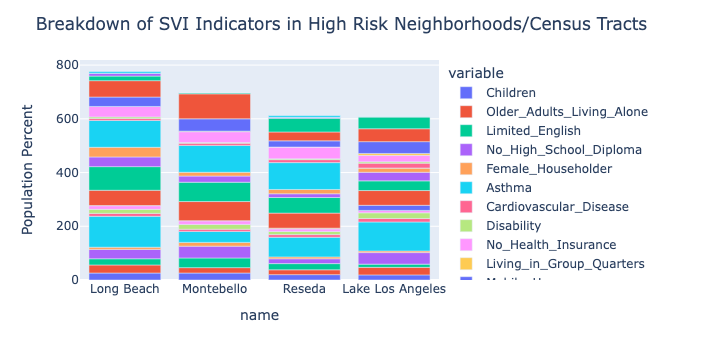

In [29]:
# make a stacked bar chart
fig = px.bar(featured,
       x='name',
       y=svi_indicators,
      #color='grp_description', # this creates the "stack"
        labels={'Social Vulnerability Indicators'})
#adding titles
fig.update_layout(
    title='Breakdown of SVI Indicators in High Risk Neighborhoods/Census Tracts',
    yaxis=dict(
        title='Population Percent'))

fig.show()

In [ ]:
#add display of overall SVI score at top of each bar
#clean up naming/titles
#improve pop-up display information
#print to html

In [30]:
fig.write_html("featured.html")